## Importamos librerías

In [2]:
import pandas as pd               #Aquí importamos varias librerías de Python como Pandas, Matplotlib y Seaborn.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Subimos archivos CSV del INE

Este dataframe "2941 (1)" muestra: Viajeros, pernoctaciones por tipo de alojamiento por comunidades y ciudades autónomas<br>
Comunidades Autónomas: Andalucía, Cataluña, Valencia, Madrid, Islas Baleares<br>
Residencia: Residentes en España y residentes en el extranjero<br>
Viajero y pernoctaciones<br>
Periodo: Fechas 2023 y 2024<br>

In [3]:
ruta = "C:/Users/crist/ProjecteData/Equip_E/Data/2941 (1).csv"
# Cargar el archivo con separador y codificación adecuados
df = pd.read_csv(ruta, sep=";", encoding="latin1")
df.head()


,Tipo de alojamiento,Total Nacional,Comunidades y Ciudades Autónomas,Residencia: Nivel 1,Residencia: Nivel 2,Viajeros y pernoctaciones,Periodo,Total
0,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,Total,Residentes en España,Viajero,2025M01,528.371
1,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,Total,Residentes en España,Viajero,2024M12,646.530
2,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,Total,Residentes en España,Viajero,2024M11,675.397
3,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,Total,Residentes en España,Viajero,2024M10,796.871
4,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,Total,Residentes en España,Viajero,2024M09,991.041


In [4]:
df.shape

(2500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Tipo de alojamiento               2500 non-null   object
 1   Total Nacional                    2500 non-null   object
 2   Comunidades y Ciudades Autónomas  2500 non-null   object
 3   Residencia: Nivel 1               2500 non-null   object
 4   Residencia: Nivel 2               2500 non-null   object
 5   Viajeros y pernoctaciones         2500 non-null   object
 6   Periodo                           2500 non-null   object
 7   Total                             2500 non-null   object
dtypes: object(8)
memory usage: 156.4+ KB


Este dataframe 2940 muestra: Estancia media, por tipo de alojamiento por comunidad y ciudades autónomas.<br>
Comunidades Autónomas: Andalucía, Cataluña, Valencia, Madrid, Islas Baleares<br>
Periodo: Fechas 2023 y 2024<br>
Enlace: https://www.ine.es/jaxiT3/Datos.htm?t=2940

In [6]:
ruta = "C:/Users/crist/ProjecteData/Equip_E/Data/2940.csv"
# Cargar el archivo con separador y codificación adecuados
df_estancia = pd.read_csv(ruta, sep=";", encoding="latin1")
df_estancia.head()

,Tipo de alojamiento,Total Nacional,Comunidades y Ciudades Autónomas,Periodo,Total
0,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,2024M12,"2,27"
1,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,2024M11,"2,43"
2,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,2024M10,"2,79"
3,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,2024M09,"3,00"
4,Encuesta de Ocupación Hotelera,Total Nacional,01 Andalucía,2024M08,"3,34"


In [7]:
df_estancia.shape

(600, 5)

In [8]:
df_estancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Tipo de alojamiento               600 non-null    object
 1   Total Nacional                    600 non-null    object
 2   Comunidades y Ciudades Autónomas  600 non-null    object
 3   Periodo                           600 non-null    object
 4   Total                             600 non-null    object
dtypes: object(5)
memory usage: 23.6+ KB


# Limpieza de datos

Transformamos a enteros, float y datatime las columnas que nos interesan

In [9]:
#Convertir en el df "Total" a número (int)
df["Total"] = (
    df["Total"]
    .str.replace(".", "", regex=False)   # Quitar puntos de miles
    .str.strip()                         # Eliminar espacios
    .replace("", pd.NA)                  # Vacíos a NA
    .pipe(pd.to_numeric, errors="coerce")  # Convertir a número, errores → NaN
    .astype("Int64")                     # Entero que acepta nulos
)
# Convertir "Periodo" a fecha real
df["Periodo_dt"] = (
    df["Periodo"]
    .str.replace("M", "-", regex=False)    # De "2023M08" a "2023-08"
    .pipe(pd.to_datetime, format="%Y-%m", errors="coerce")  # Convertir a fecha
)

# Eliminar fechas inválidas si las hubiera
df = df.dropna(subset=["Periodo_dt"])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tipo de alojamiento               2500 non-null   object        
 1   Total Nacional                    2500 non-null   object        
 2   Comunidades y Ciudades Autónomas  2500 non-null   object        
 3   Residencia: Nivel 1               2500 non-null   object        
 4   Residencia: Nivel 2               2500 non-null   object        
 5   Viajeros y pernoctaciones         2500 non-null   object        
 6   Periodo                           2500 non-null   object        
 7   Total                             2376 non-null   Int64         
 8   Periodo_dt                        2500 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 178.4+ KB


In [11]:
#  Limpiar en df_estancia la columna "Total" → convertir a float
df_estancia["Total"] = (
    df_estancia["Total"]
    .str.replace(",", ".", regex=False)   # Cambiar coma decimal por punto
    .str.strip()
    .replace("", pd.NA)
    .pipe(pd.to_numeric, errors="coerce")  # Convertir a número (float)
)
# Convertir la columna "Periodo" a fecha real (datetime)
df_estancia["Periodo_dt"] = (
    df_estancia["Periodo"]
    .str.replace("M", "-", regex=False)
    .pipe(pd.to_datetime, format="%Y-%m", errors="coerce")
)

# Eliminar filas con fechas inválidas
df_estancia = df_estancia.dropna(subset=["Periodo_dt"])


In [12]:
df_estancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tipo de alojamiento               600 non-null    object        
 1   Total Nacional                    600 non-null    object        
 2   Comunidades y Ciudades Autónomas  600 non-null    object        
 3   Periodo                           600 non-null    object        
 4   Total                             571 non-null    float64       
 5   Periodo_dt                        600 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 28.3+ KB


# Desafío: 
## ¿Es necesario ajustar nuestras ofertas al perfil del viajero y a la demanda de pernoctaciones en las ciudades donde estamos presentes, considerando las cifras oficiales sobre procedencia, meses de visita y media de pernoctaciones por ciudad autónoma?

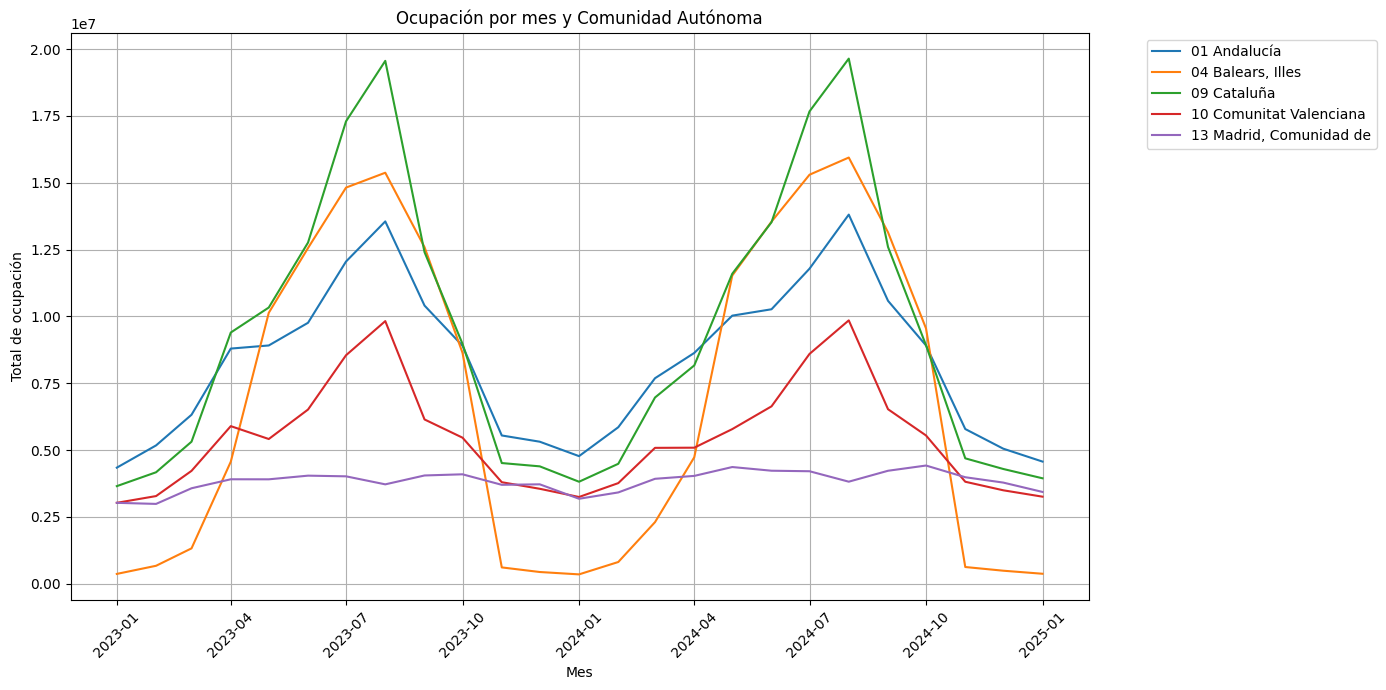

In [13]:
import matplotlib.pyplot as plt

# Agrupar por comunidad y mes (ya convertida a fecha real)
ocupacion_por_ciudad = df.groupby(
    ["Periodo_dt", "Comunidades y Ciudades Autónomas"]
)["Total"].sum().reset_index()

# Crear el gráfico
plt.figure(figsize=(14, 7))

# Dibujar una línea por cada comunidad
for comunidad in ocupacion_por_ciudad["Comunidades y Ciudades Autónomas"].unique():
    datos = ocupacion_por_ciudad[ocupacion_por_ciudad["Comunidades y Ciudades Autónomas"] == comunidad]
    plt.plot(datos["Periodo_dt"], datos["Total"], label=comunidad)

# Estética
plt.title("Ocupación por mes y Comunidad Autónoma")
plt.xlabel("Mes")
plt.ylabel("Total de ocupación")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.tight_layout()
plt.grid(True)
plt.show()


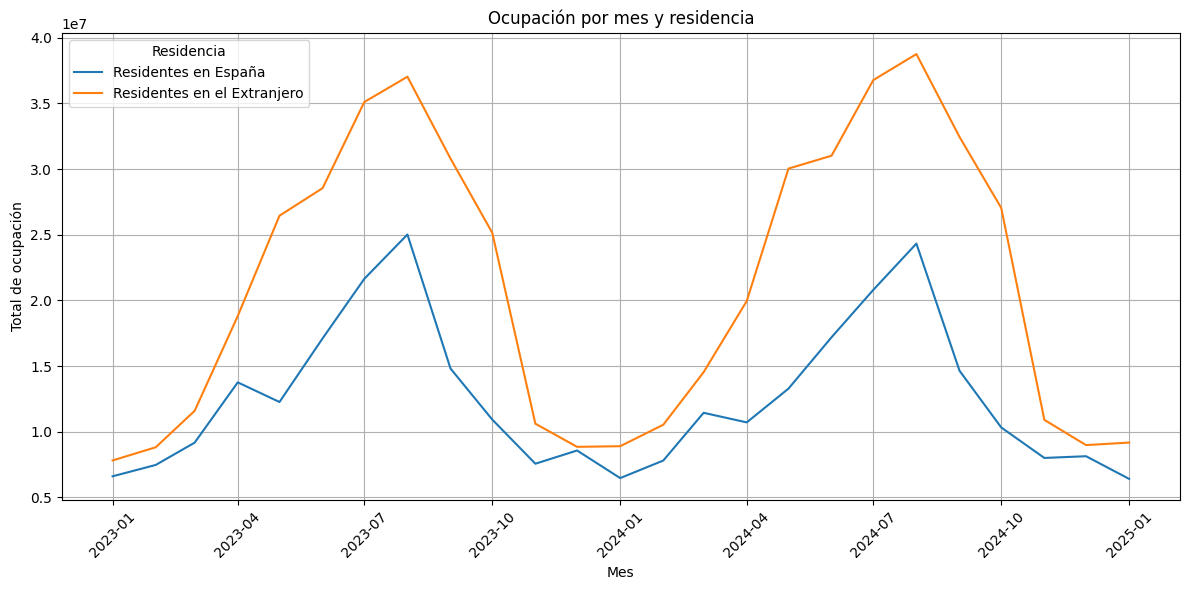

In [14]:
import matplotlib.pyplot as plt

# Agrupar por mes y tipo de residencia
ocupacion_por_residencia = df.groupby(
    ["Periodo_dt", "Residencia: Nivel 2"]
)["Total"].sum().reset_index()

# Crear gráfico
plt.figure(figsize=(12, 6))

# Dibujar una línea por cada tipo de residencia
for residencia in ocupacion_por_residencia["Residencia: Nivel 2"].unique():
    datos = ocupacion_por_residencia[ocupacion_por_residencia["Residencia: Nivel 2"] == residencia]
    plt.plot(datos["Periodo_dt"], datos["Total"], label=residencia)

# Estética
plt.title("Ocupación por mes y residencia")
plt.xlabel("Mes")
plt.ylabel("Total de ocupación")
plt.xticks(rotation=45)
plt.legend(title="Residencia")
plt.tight_layout()
plt.grid(True)
plt.show()


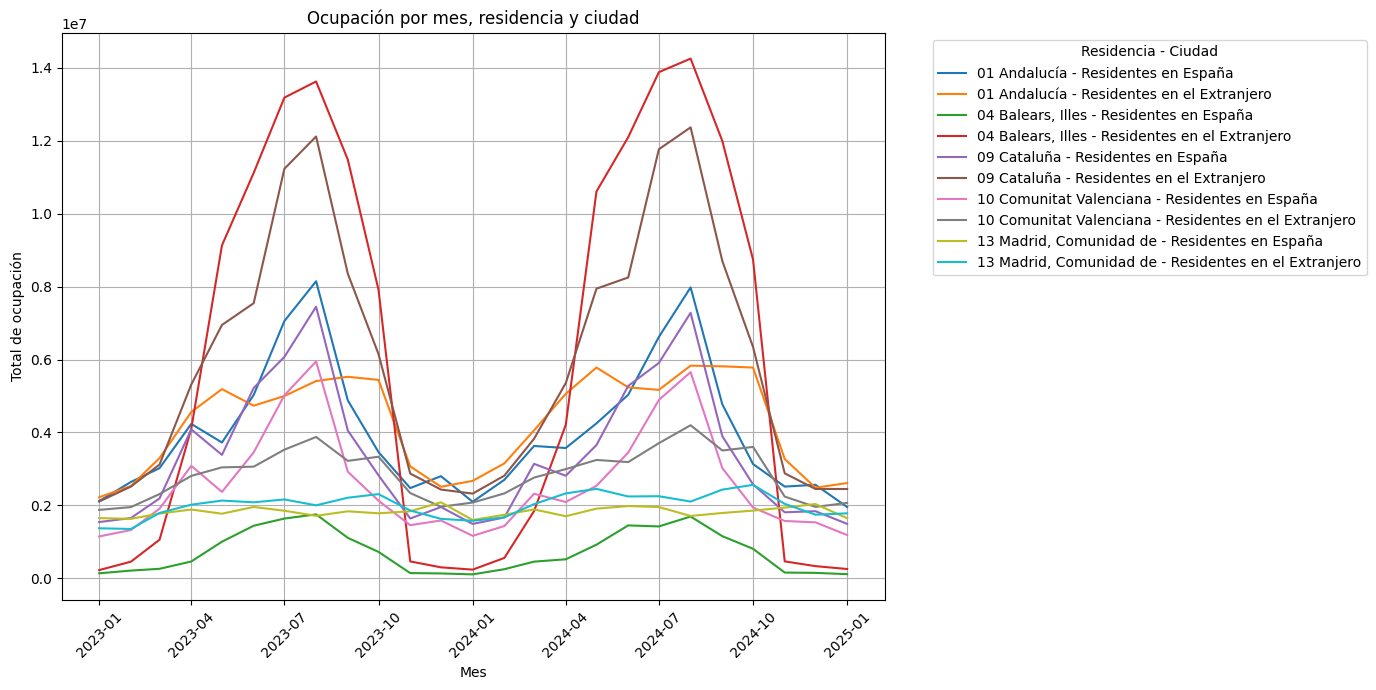

In [15]:
import matplotlib.pyplot as plt

# Agrupar por mes, tipo de residencia y comunidad autónoma
ocupacion_por_residencia_y_ciudad = df.groupby(
    ["Periodo_dt", "Residencia: Nivel 2", "Comunidades y Ciudades Autónomas"]
)["Total"].sum().reset_index()

# Crear gráfico
plt.figure(figsize=(14, 7))

# Dibujar una línea por cada tipo de residencia y comunidad autónoma
for comunidad in ocupacion_por_residencia_y_ciudad["Comunidades y Ciudades Autónomas"].unique():
    for residencia in ocupacion_por_residencia_y_ciudad["Residencia: Nivel 2"].unique():
        # Filtrar los datos por comunidad y residencia
        datos = ocupacion_por_residencia_y_ciudad[
            (ocupacion_por_residencia_y_ciudad["Comunidades y Ciudades Autónomas"] == comunidad) &
            (ocupacion_por_residencia_y_ciudad["Residencia: Nivel 2"] == residencia)
        ]
        plt.plot(datos["Periodo_dt"], datos["Total"], label=f"{comunidad} - {residencia}")

# Estética
plt.title("Ocupación por mes, residencia y ciudad")
plt.xlabel("Mes")
plt.ylabel("Total de ocupación")
plt.xticks(rotation=45)
plt.legend(title="Residencia - Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


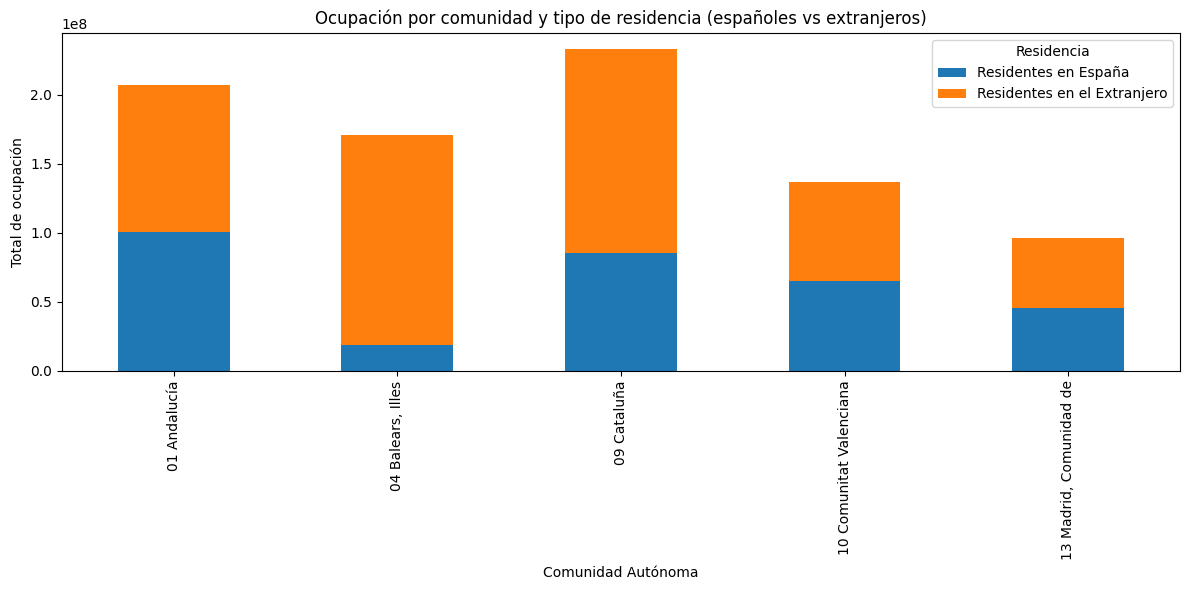

In [18]:
# Agrupar por comunidad autónoma y tipo de residencia (españoles vs extranjeros)
perfil_viajero = df.groupby(["Comunidades y Ciudades Autónomas", "Residencia: Nivel 2"])["Total"].sum().unstack().fillna(0)

# Crear gráfico de barras apiladas
perfil_viajero.plot(kind="bar", stacked=True, figsize=(12, 6), color=["#1f77b4", "#ff7f0e"])

# Estética
plt.title("Ocupación por comunidad y tipo de residencia (españoles vs extranjeros)")
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Total de ocupación")
plt.xticks(rotation=90)
plt.legend(title="Residencia", labels=["Residentes en España", "Residentes en el Extranjero"])
plt.tight_layout()
plt.show()


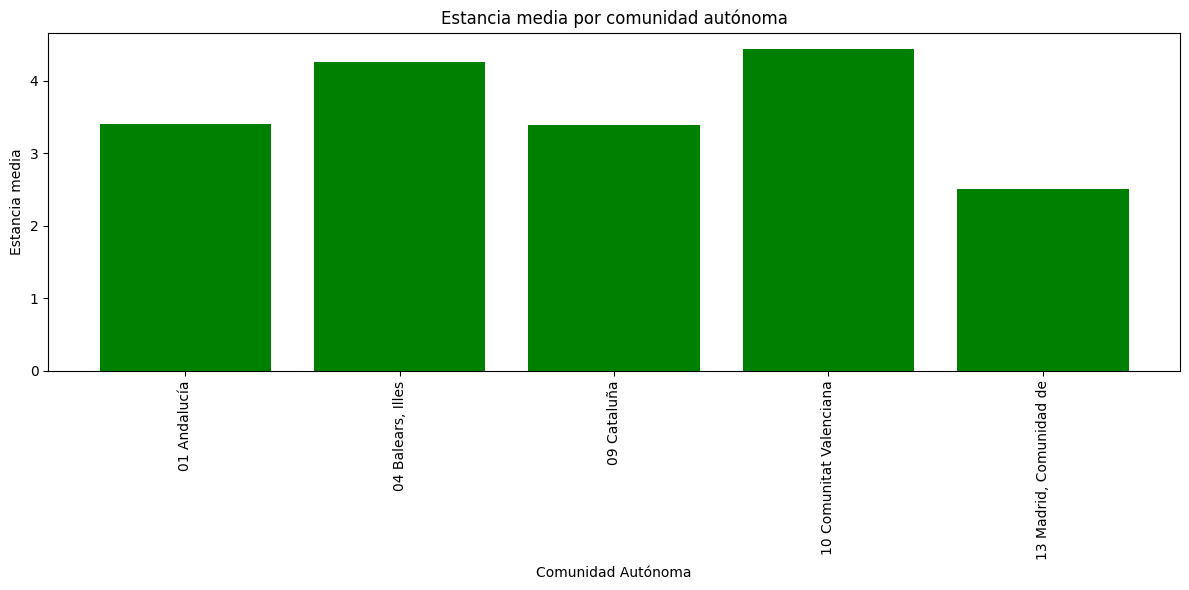

In [17]:
# Agrupar por comunidad y calcular la estancia media
estancia_media_comunidad = df_estancia.groupby("Comunidades y Ciudades Autónomas")["Total"].mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

plt.bar(estancia_media_comunidad["Comunidades y Ciudades Autónomas"], estancia_media_comunidad["Total"], color="g")
plt.title("Estancia media por comunidad autónoma")
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Estancia media")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


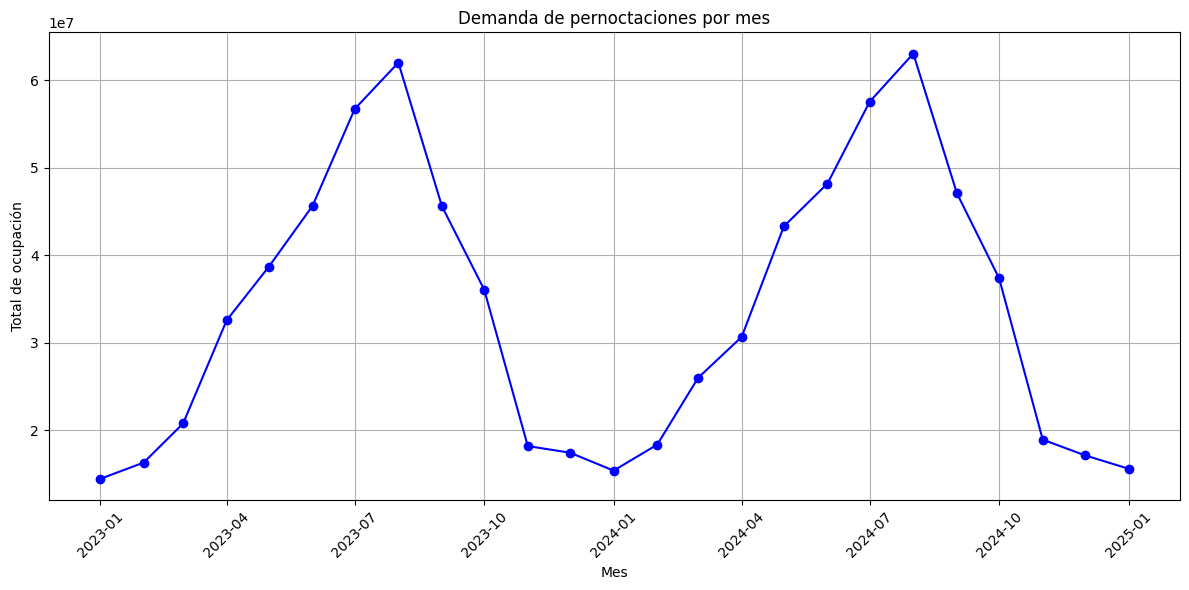

In [19]:
# Agrupar por mes para ver la ocupación total por mes
ocupacion_mes = df.groupby("Periodo_dt")["Total"].sum().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))

plt.plot(ocupacion_mes["Periodo_dt"], ocupacion_mes["Total"], marker="o", color="b")
plt.title("Demanda de pernoctaciones por mes")
plt.xlabel("Mes")
plt.ylabel("Total de ocupación")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Tendencia

-Perfil del viajero: Residentes vs. Extranjeros<br>
Distribución por residencia: Según los gráficos de ocupación por tipo de residencia, las comunidades autónomas más turísticas (como Andalucía, Baleares, y Cataluña) presentan una alta ocupación de residentes extranjeros. Esto sugiere que hay una demanda constante de turistas internacionales, sobre todo en los meses de verano o vacaciones.<br>
Tendencia para el mercado nacional: El perfil de los viajeros residentes en España mantiene una ocupación más estable, aunque con fluctuaciones dependiendo de la estacionalidad. Las comunidades con mayor atracción para turistas internacionales también parecen ver una mayor ocupación de residentes españoles en los meses fuera de temporada alta (por ejemplo, en meses de baja demanda o invierno).<br>

-Demanda de pernoctaciones por mes<br>
Picos estacionales: La ocupación crece significativamente durante los meses de verano y festivos, lo que se traduce en una mayor demanda de pernoctaciones. Es evidente que el turismo se concentra en épocas de alta demanda.<br>

Las bajas temporadas muestran un descenso en las pernoctaciones, lo que indica que la demanda por pernoctaciones baja cuando no es temporada alta.<br>

-Estancia media por comunidad<br>
Diferencias en la estancia media: Algunas comunidades tienen una estancia media más larga, lo que sugiere que los turistas se quedan más tiempo en estas zonas. En cambio, las comunidades más urbanas o turísticas (por ejemplo, Madrid) pueden tener estancias más cortas. <br>

Las zonas rurales o costeras pueden tener estancias más largas, lo que implica que los viajeros en estas áreas buscan estancias más relajadas o vacaciones prolongadas.<br>

-Ajuste de ofertas por ciudad/comunidad<br>
Las comunidades autónomas más visitadas como Andalucía, Baleares y Cataluña siguen dominando la demanda de pernoctaciones, especialmente entre los turistas internacionales.<br>

Las zonas menos turísticas (rurales, como algunas comunidades del norte) muestran una ocupación más baja, lo que sugiere que estas áreas podrían necesitar incentivos adicionales para aumentar la ocupación.<br>

# Propuestas de Negocio

1. Ofertas especiales para turistas internacionales en temporada alta<br>
Propuesta: Durante los meses de alta demanda, especialmente en verano y vacaciones, aumentar la visibilidad de ofertas dirigidas a turistas internacionales. Esto puede incluir: <br>
-Paquetes turísticos o descuentos para grupos grandes (familias, amigos).<br>
-Ofertas de largo plazo para estancias prolongadas (de 1 semana o más).<br>
-Paquetes todo incluido o actividades complementarias como excursiones o entradas a eventos culturales en la comunidad.<br>
Objetivo: Maximizar la ocupación en los meses de alta demanda con promociones atractivas para el turismo internacional, que constituye una gran parte de la demanda en las comunidades más turísticas.

2. Promociones para residentes nacionales en temporada baja<br>
Propuesta: Reforzar las ofertas para residentes españoles durante los meses de baja ocupación.<br>
Esto puede incluir:<br>
-Descuentos especiales para residentes en comunidades con baja demanda (como zonas rurales o menos turísticas).<br>
-Promociones de fin de semana o escapadas de última hora en las ciudades menos visitadas.<br>
-Descuentos por estancias más largas (por ejemplo, estancias de 5 noches o más en zonas rurales o zonas con estancias largas).<br>
Objetivo: Atraer a los residentes españoles para mantener la ocupación durante los meses fuera de temporada alta y utilizar las temporadas bajas para equilibrar la demanda.

3. Ajustar la oferta según la estancia media<br>
Propuesta: Según la diferencia en la estancia media de cada comunidad, ajusta la oferta para que sea adecuada a la duración de la estancia:<br>
-En zonas con estancias largas (por ejemplo, Andalucía o Baleares), ofrecer descuentos por estancias prolongadas o paquetes de todo el mes.<br>
-En zonas con estancias más cortas, ofrecer paquetes rápidos o flexibles, como estancias de 1 a 3 noches, e incentivar la venta cruzada (por ejemplo, incluir actividades o servicios adicionales como transporte o excursiones).<br>
Objetivo: Adaptar la oferta a la duración de la estancia media para maximizar la ocupación, ofreciendo promociones específicas que encajen con el tipo de viajero en cada región.

4. Fomentar el turismo en zonas menos visitadas<br>
Propuesta: Para las comunidades autónomas con menos ocupación, crear campañas de marketing que resalten las ventajas de estas áreas menos turísticas. <br>
Algunas ideas incluyen:<br>
-Paquetes de fin de semana en zonas rurales o menos turísticas.<br>
-Promociones de última hora para atraer a turistas nacionales (residentes en España) que busquen destinos más tranquilos.<br>
-Establecer alianzas con empresas locales para crear paquetes de experiencias que promuevan el turismo rural (por ejemplo, senderismo, visitas a bodegas, actividades culturales).<br>
Objetivo: Reducir la dependencia de las zonas más turísticas y equilibrar la demanda en otras comunidades, atrayendo turistas nacionales durante los meses de baja ocupación.

5. Crear ofertas temáticas según el tipo de residencia<br>
Propuesta: Segmentar las ofertas según el tipo de residencia:<br>
-Para residentes españoles, crear promociones centradas en escapadas locales o turismo de cercanía.<br>
-Para turistas internacionales, diseñar ofertas relacionadas con experiencias culturales o actividades exclusivas que les permitan disfrutar de la cultura española.<br>
Ofertas combinadas para viajeros internacionales con estancias más largas que incluyan servicios adicionales (como traslados o actividades) que optimicen su experiencia.<br>
Objetivo: Personalizar la oferta para que se ajuste a las necesidades del tipo de viajero, mejorando la satisfacción y la conversión de ventas.

6. Diversificación de productos según la temporada<br>
Propuesta: Desarrollar productos adaptados a la temporada:<br>
-Durante la temporada baja, ofrecer productos de relajación y bienestar, como spas, retiros de bienestar o escapadas románticas.<br>
-En la temporada alta, centrarse en experiencias de aventura o actividades grupales como festivales, excursiones, y actividades culturales.<br>
-Promover las vacaciones activas en las zonas rurales durante la temporada baja, aprovechando la tranquilidad de la zona.<BR>
Objetivo: Asegurarse de que los productos sean relevantes para las preferencias del viajero según la temporada, mejorando la tasa de ocupación durante todo el año.<br>
Estas estrategias personalizan las ofertas según las tendencias actuales y las necesidades del mercado, lo que permitirá ajustar la oferta a la demanda y optimizar las tasas de ocupación.<br>
